# Customer Churn Analysis

In [9]:
# import kaggle
# kaggle.api.authenticate()
# kaggle.api.dataset_download_files("blastchar/telco-customer-churn",path='./Dataset',unzip=True)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from sympy.codegen.ast import continue_

In [2]:
import statsmodels.api as sta
import scipy as sp
import streamlit as st

In [3]:
churn_df = pd.read_csv(filepath_or_buffer="Dataset/WA_Fn-UseC_-Telco-Customer-Churn.csv")
churn_df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [7]:
churn_df.dtypes.rename('Data Types')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Let's quickly check if all elements are non-null.

In [5]:
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [159]:
def plot_col(col_names:str,color:str = "blue") -> plt.axes or str:
    plt.figure(figsize=(8,8));
    ax1 = (
        churn_df.
        value_counts(subset=col_names).
        plot(kind='bar',color=color,rot=0,fontsize=12)
    );
    # dir(ax1)
    ax1.set_xlabel(xlabel=col_names,size=15,fontname='Arial');
    ax1.set_ylabel(ylabel='Count',size=15,fontname='Arial');
    ax1.set_title(label=f'{str.capitalize(col_names)} Counts',size=20,fontname='Arial',fontweight='bold');
    for sub_ax in ax1.patches:
        plt.text(x=sub_ax.get_x()+(sub_ax.get_width()/2),y=sub_ax.get_height()+50,s=str(sub_ax.get_height()),fontname='Arial',fontsize=15,ha='center',color='black',fontweight='bold');
    plt.show()
    return ax1

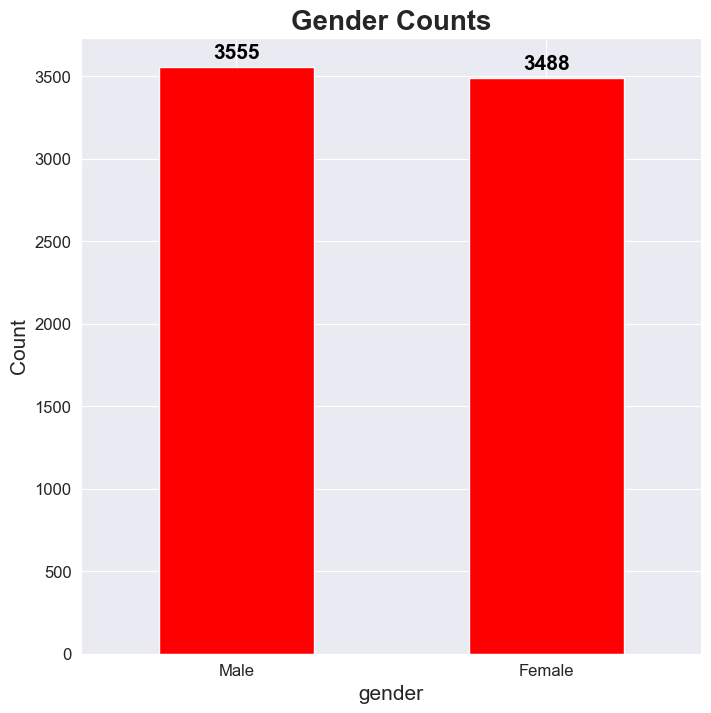

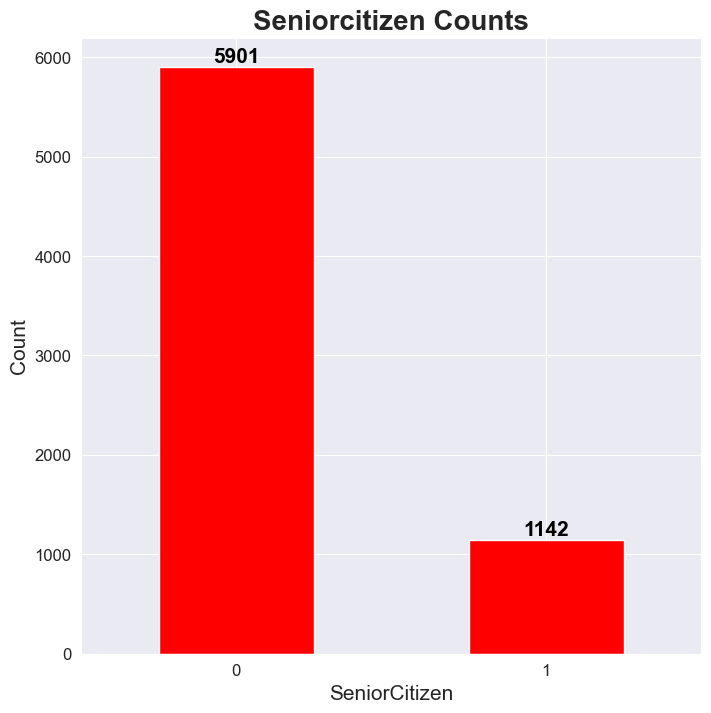

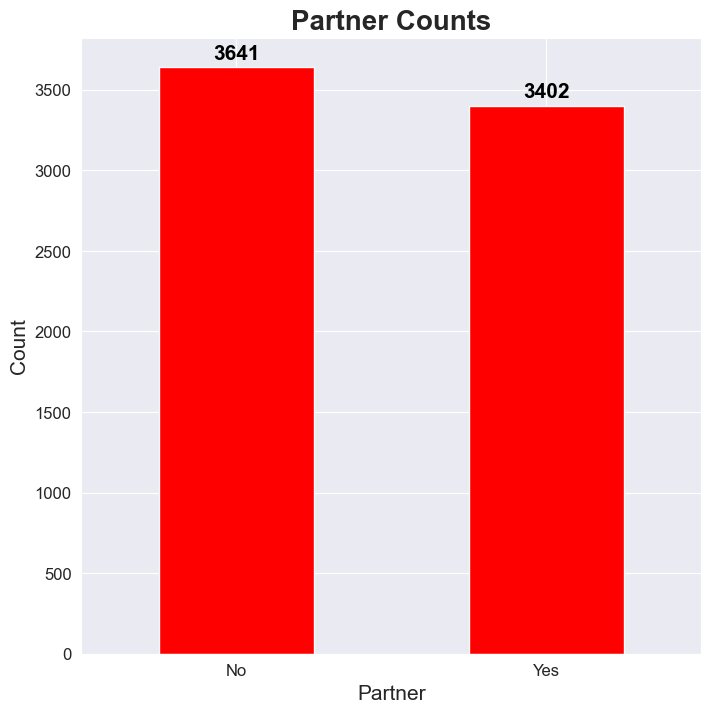

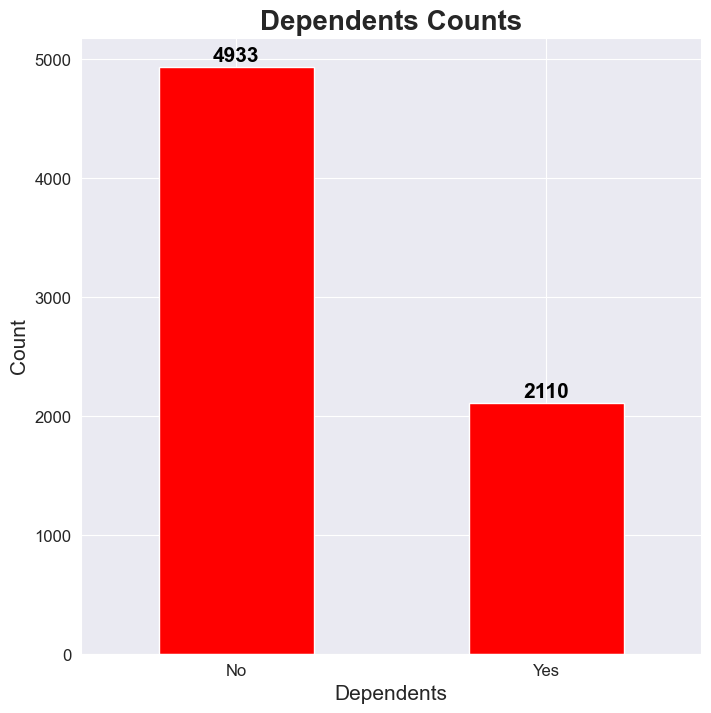

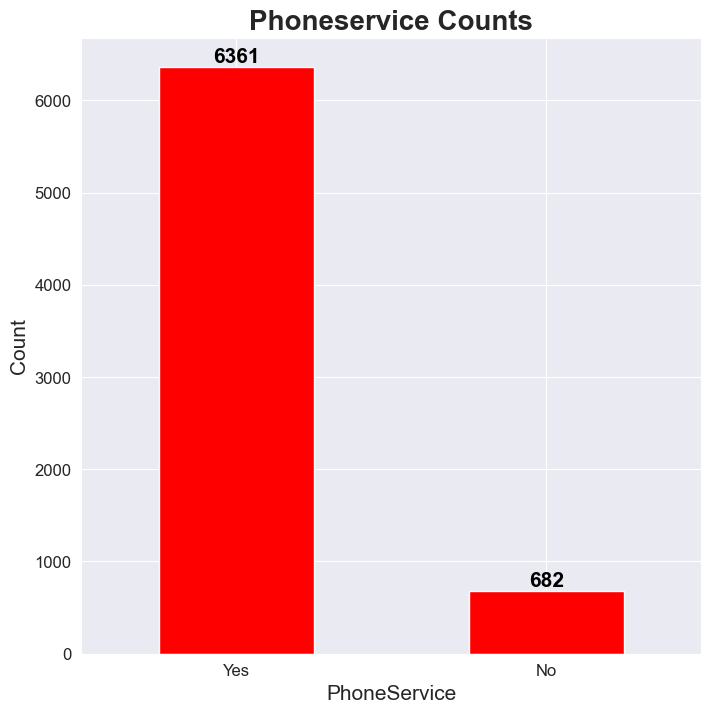

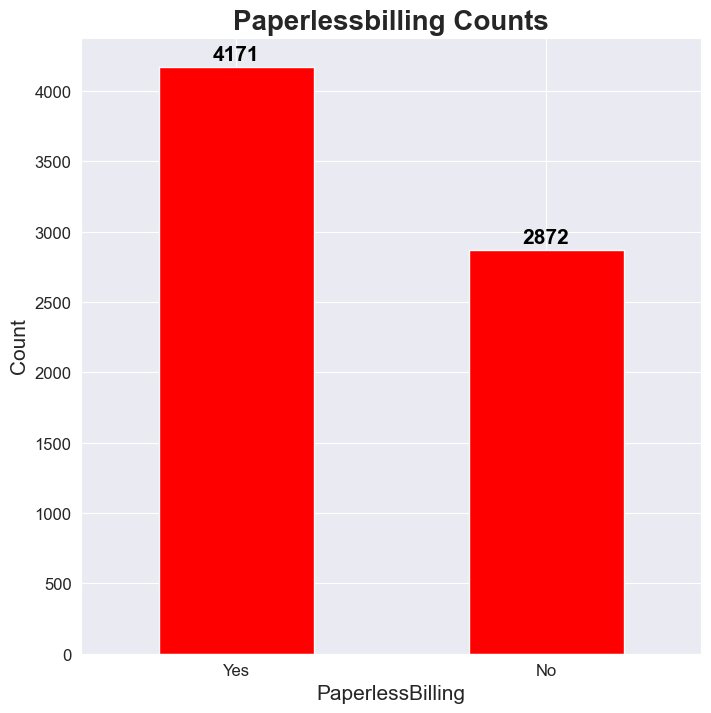

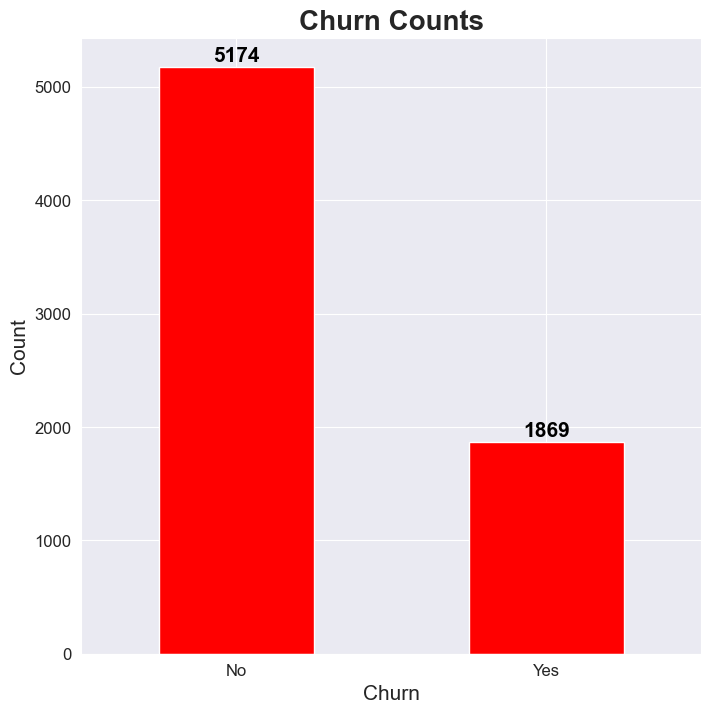

In [160]:
categorical_ls = []
for col in churn_df.columns:
    if len(churn_df[col].unique()) == 2:
        categorical_ls.append(col)
        plot_col(col,color = "red")

### __Results from plots above__:
1. There are approximately an equal amount of males and females in the dataset
2. There is a small, but sizeable amount of senior citizens
3. Slightly more than half the individuals in the dataset have a partner
4. About 70% of the individuals have dependents
5.

In [161]:
4933/churn_df.shape[0]

0.7004117563538265